# Attempts to speed up Voronoi-binning

Isaac Cheng - November 2021


In [1]:
import time
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import reproject
from astropy.io import fits
from astropy.wcs import WCS
from vorbin.voronoi_2d_binning import voronoi_2d_binning
# My packages
import sys
sys.path.append("/arc/home/IsaacCheng/coop_f2021/packages")
import fits_utils as fu
import plot_utils as pu
import fast_vorbin as fv
# Reload my packages
import importlib
importlib.reload(fu)
importlib.reload(pu)
importlib.reload(fv)

<module 'fast_vorbin' from '/arc/home/IsaacCheng/coop_f2021/packages/fast_vorbin.py'>

In [4]:
# 
# Explicitly setting array values to floats
# 
# Generate uniform pixels
num_px = 200
x_coords = np.arange(1, num_px + 1).astype(int)
y_coords = np.arange(1, num_px + 1).astype(int)
x_coords, y_coords = np.meshgrid(x_coords, y_coords)
gi_colour = np.full(x_coords.size, 0.5)
gi_colour_err = np.full(x_coords.size, 1.0)
# 
starttime = time.time()
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = fv.voronoi_2d_binning(
    y_coords.flatten(),
    x_coords.flatten(),
    gi_colour.flatten(),
    gi_colour_err.flatten(),
    targetSN=10,
    pixelsize=1,
    cvt=False,
    quiet=True,
    wvt=False,
    sn_func=None,
    plot=False,
)
endtime = time.time()
timediff = endtime - starttime
print("NUMBA VORBIN TOTAL: it took", timediff, "seconds to complete Voronoi binning.")
# 
# Explicitly setting array values to floats
# 
# Generate uniform pixels
num_px = 200
x_coords = np.arange(1, num_px + 1).astype(int)
y_coords = np.arange(1, num_px + 1).astype(int)
x_coords, y_coords = np.meshgrid(x_coords, y_coords)
gi_colour = np.full(x_coords.size, 0.5)
gi_colour_err = np.full(x_coords.size, 1.0)
# 
starttime = time.time()
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = voronoi_2d_binning(
    y_coords.flatten(),
    x_coords.flatten(),
    gi_colour.flatten(),
    gi_colour_err.flatten(),
    targetSN=10,
    pixelsize=1,
    cvt=False,
    quiet=True,
    wvt=False,
    sn_func=None,
    plot=False,
)
endtime = time.time()
timediff = endtime - starttime
print("REGULAR VORBIN TOTAL: it took", timediff, "seconds to complete Voronoi binning.")

Compiling bin accretion algorithm
Compiling voronoi tesselation algorithm
Bin-accretion done in 0.11 minutes
It took 0.11 minutes to finish Voronoi-binning!
NUMBA VORBIN TOTAL: it took 7.482622861862183 seconds to complete Voronoi binning.
REGULAR VORBIN TOTAL: it took 17.41737675666809 seconds to complete Voronoi binning.


Compiling bin accretion algorithm
Compiling voronoi tesselation algorithm
Bin-accretion done in 0.10 minutes
It took 0.11 minutes to finish Voronoi-binning!


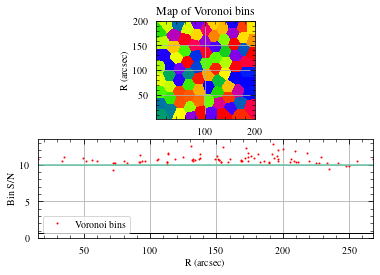

TOTAL: it took 7.892381429672241 seconds to complete Voronoi binning.


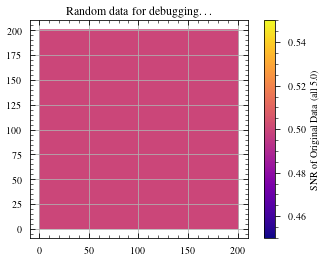

In [77]:
# 
# Explicitly setting array values to floats
# 
# Generate uniform pixels
num_px = 200
x_coords = np.arange(1, num_px + 1).astype(int)
y_coords = np.arange(1, num_px + 1).astype(int)
x_coords, y_coords = np.meshgrid(x_coords, y_coords)
gi_colour = np.full(x_coords.size, 0.5)
gi_colour_err = np.full(x_coords.size, 1.0)
# 
starttime = time.time()
binNum, xNode, yNode, xBar, yBar, sn, nPixels, scale = fv.voronoi_2d_binning(
    y_coords.flatten(),
    x_coords.flatten(),
    gi_colour.flatten(),
    gi_colour_err.flatten(),
    targetSN=10,
    pixelsize=1,
    cvt=False,
    quiet=True,
    wvt=False,
    sn_func=None,
    plot=True,
)
endtime = time.time()
timediff = endtime - starttime
print("TOTAL: it took", timediff, "seconds to complete Voronoi binning.")


cmap = "plasma"
cmap = mpl.cm.get_cmap(cmap)
#
fig, ax = plt.subplots()
img = ax.scatter(
    x_coords.flatten(), y_coords.flatten(), c=(gi_colour/gi_colour_err), cmap=cmap, s=1
)
cbar = fig.colorbar(img)
cbar.ax.tick_params(which="both", direction="out")
cbar.set_label("SNR of Original Data (all 5.0)")
ax.set_title("Random data for debugging\\ldots")
# ax.grid(False)
ax.set_aspect("equal")
# fig.savefig("imgs/raw_random_data.pdf")
plt.show()

In [16]:
import numpy as np
from numba_kdtree import KDTree
data = np.random.random(3000000).reshape(-1, 3)
print(data.shape)
kdtree = KDTree(data, leafsize=16)

# query the nearest neighbors of the first 100 points
distances, indices = kdtree.query(data[:100], k=30)

# query all points in a radius around the first 100 points
indices = kdtree.query_radius(data[:100], r=0.5, return_sorted=True)

(1000000, 3)


# Testing hierarchical approach to Voronoi binning


In [6]:
import time
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import reproject
from astropy.io import fits
from astropy.wcs import WCS
from vorbin.voronoi_2d_binning import voronoi_2d_binning
# My packages
import sys
sys.path.append("/arc/home/IsaacCheng/coop_f2021/packages")
import fits_utils as fu
import plot_utils as pu
# import fast_vorbin as fv
import fast_vorbin_utils as fvu
# Reload my packages
import importlib
importlib.reload(fu)
importlib.reload(pu)
# importlib.reload(fv)
importlib.reload(fvu)

<module 'fast_vorbin_utils' from '/arc/home/IsaacCheng/coop_f2021/packages/fast_vorbin_utils.py'>

(9, 12)
Reprojecting & binning the input arrays to desired shape
Voronoi-binning the binned array
Compiling bin accretion algorithm
Compiling voronoi tesselation algorithm
Bin-accretion done in 0.00 minutes
It took 0.01 minutes to finish Voronoi-binning!


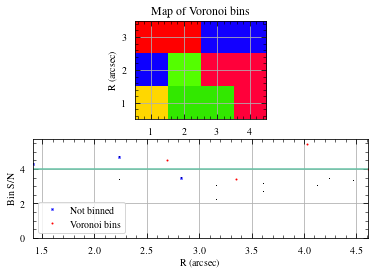

Making tmp_binnum_arr


In [12]:
GALAXY = "NGC4380"
Ico_path = f"/arc/home/IsaacCheng/coop_f2021/vertico_data/v1.3/9arcsec/{GALAXY}/{GALAXY}_7m+tp_co21_pbcorr_9as_round_mom0_Kkms-1.fits"
Ico_wcs = WCS(fits.getheader(Ico_path))
rng = np.random.default_rng(314)
# tmpnumpx = 200
# tmpx = np.arange(1, tmpnumpx + 1).astype(int)
# tmpy = np.arange(1, tmpnumpx + 1).astype(int)
tmpx = np.arange(1, 13).astype(int)
tmpy = np.arange(1, 10).astype(int)
tmpx, tmpy = np.meshgrid(tmpx, tmpy)
tmpsig = rng.uniform(low=0.25, high=1.5, size=tmpx.size).reshape(tmpx.shape)
tmpnoise = rng.uniform(low=0.5, high=1.0, size=tmpx.size).reshape(tmpx.shape)
print(tmpsig.shape)
tmpresults = fvu.hierarchical_vorbin(tmpsig, tmpnoise, Ico_wcs, (3, 4), snr_target=4, prelim_bin_kwargs={"print_debug": False})

In [11]:
tmpshape = tmpresults[0].shape
print(tmpresults[0])
print(tmpresults[1])
print(tmpresults[0][tmpresults[4]].reshape(tmpshape))
print(tmpresults[1][tmpresults[4]])
print(tmpresults[5].reshape(tmpshape))
print(tmpresults[-1])
print(tmpresults[-5]/tmpresults[-4])
print(tmpresults[-2])

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[1 1 1 1 2 2 2 2 3 3 3 3]
[[1 2 2 4]
 [0 3 4 4]
 [5 5 6 6]]
[[1. 2. 2. 4.]
 [0. 3. 4. 4.]
 [5. 5. 6. 6.]]
[[4.28391896 3.3822693  3.00585281 3.03815048]
 [4.68227325 3.46033523 3.13467334 3.28740836]
 [2.17419949 2.69296984 3.41280101 2.23195864]]
[[1 1 1 1 2 2 2 2 3 3 3 3]
 [1 1 1 1 2 2 2 2 3 3 3 3]
 [1 1 1 1 2 2 2 2 3 3 3 3]
 [4 4 4 4 5 5 5 5 6 6 6 6]
 [4 4 4 4 5 5 5 5 6 6 6 6]
 [4 4 4 4 5 5 5 5 6 6 6 6]
 [7 7 7 7 8 8 8 8 9 9 9 9]
 [7 7 7 7 8 8 8 8 9 9 9 9]
 [7 7 7 7 8 8 8 8 9 9 9 9]]
